In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.optimize import curve_fit

def possibilities(n):
    hat = list(range(1, n + 1))
    possibilities = []

    def explore(hat, seq):
        if len(hat) == 1:
            possibilities.append(seq + [hat[0]])
        else:
            for i in range(len(hat)):
                for j in range(i + 1, len(hat)):
                    draw1 = hat[i]
                    draw2 = hat[j]
                    new_hat = [num for idx, num in enumerate(hat) if idx != i and idx != j]
                    larger = max(draw1, draw2)
                    smaller = min(draw1, draw2)
                    difference = larger - smaller
                    explore(new_hat + [difference], seq + [(draw1, draw2, difference)])

    explore(hat, [])

    return possibilities

all_possibilities = possibilities(4)

for i, possibility in enumerate(all_possibilities):
    print(f"Sequence {i + 1}:")
    for step in possibility:
        if isinstance(step, int):
            print(f"  Final piece of paper: {step}")
        else:
            print(f"  Draw: {step[0]} and {step[1]}, Subtract: {step[0]} - {step[1]} = {step[2]}")
    print()

Sequence 1:
  Draw: 1 and 2, Subtract: 1 - 2 = 1
  Draw: 3 and 4, Subtract: 3 - 4 = 1
  Draw: 1 and 1, Subtract: 1 - 1 = 0
  Final piece of paper: 0

Sequence 2:
  Draw: 1 and 2, Subtract: 1 - 2 = 1
  Draw: 3 and 1, Subtract: 3 - 1 = 2
  Draw: 4 and 2, Subtract: 4 - 2 = 2
  Final piece of paper: 2

Sequence 3:
  Draw: 1 and 2, Subtract: 1 - 2 = 1
  Draw: 4 and 1, Subtract: 4 - 1 = 3
  Draw: 3 and 3, Subtract: 3 - 3 = 0
  Final piece of paper: 0

Sequence 4:
  Draw: 1 and 3, Subtract: 1 - 3 = 2
  Draw: 2 and 4, Subtract: 2 - 4 = 2
  Draw: 2 and 2, Subtract: 2 - 2 = 0
  Final piece of paper: 0

Sequence 5:
  Draw: 1 and 3, Subtract: 1 - 3 = 2
  Draw: 2 and 2, Subtract: 2 - 2 = 0
  Draw: 4 and 0, Subtract: 4 - 0 = 4
  Final piece of paper: 4

Sequence 6:
  Draw: 1 and 3, Subtract: 1 - 3 = 2
  Draw: 4 and 2, Subtract: 4 - 2 = 2
  Draw: 2 and 2, Subtract: 2 - 2 = 0
  Final piece of paper: 0

Sequence 7:
  Draw: 1 and 4, Subtract: 1 - 4 = 3
  Draw: 2 and 3, Subtract: 2 - 3 = 1
  Draw: 3 and 

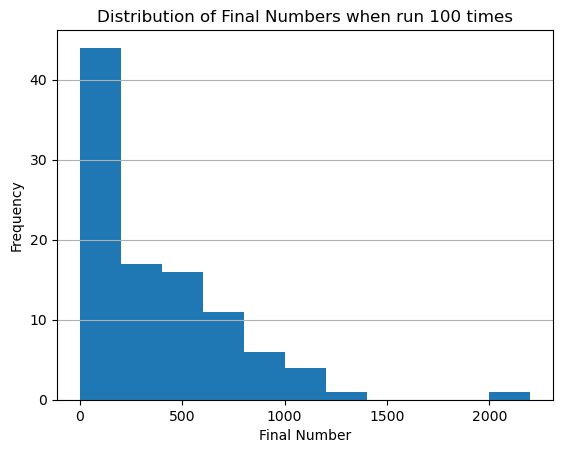

In [2]:
def simulate(num_games, num_papers):
    final_numbers = []
    
    for _ in range(num_games):
        hat = list(range(1, num_papers + 1))
        
        while len(hat) > 1:
            draw1 = random.choice(hat)
            hat.remove(draw1)
            draw2 = random.choice(hat)
            hat.remove(draw2)
            
            larger = max(draw1, draw2)
            smaller = min(draw1, draw2)
            difference = larger - smaller
            
            hat.append(difference)

        final_numbers.append(hat[0])
    
    return final_numbers

num_games = 100
num_papers = 2024

final_numbers = simulate(num_games, num_papers)

group = 200
grouped_numbers = [0] * (num_papers // group + 1)
for number in final_numbers:
    group_index = (number - 1) // group
    grouped_numbers[group_index] += 1

bins = np.arange(0, num_papers + group + 1, group)

plt.bar(bins[:-1], grouped_numbers, align='edge', width=group)
plt.title(f'Distribution of Final Numbers when run {num_games} times')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

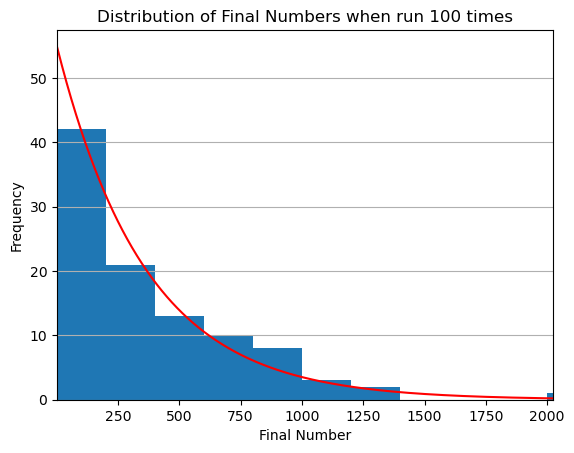

In [3]:
def simulate(num_games, num_papers):
    final_numbers = []
    
    for _ in range(num_games):
        hat = list(range(1, num_papers + 1))
        
        while len(hat) > 1:
            draw1 = random.choice(hat)
            hat.remove(draw1)
            draw2 = random.choice(hat)
            hat.remove(draw2)
            
            larger = max(draw1, draw2)
            smaller = min(draw1, draw2)
            difference = larger - smaller
            
            hat.append(difference)

        final_numbers.append(hat[0])
    
    return final_numbers

num_games = 100
num_papers = 2024

final_numbers = simulate(num_games, num_papers)

group = 200
grouped_numbers = [0] * (num_papers // group + 1)
for number in final_numbers:
    group_index = (number - 1) // group
    grouped_numbers[group_index] += 1

bins = np.arange(0, num_papers + group + 1, group)

params = expon.fit(final_numbers)
curve = expon.pdf(np.arange(1, num_papers + 1), *params) * num_games * group

plt.bar(bins[:-1], grouped_numbers, align='edge', width=group)
plt.plot(np.arange(2, num_papers + 1), curve[1:], color='red', label='Exponential Distribution')
plt.xlim(1, num_papers)
plt.title(f'Distribution of Final Numbers when run {num_games} times')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()